In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

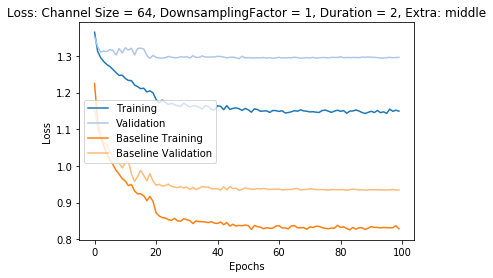

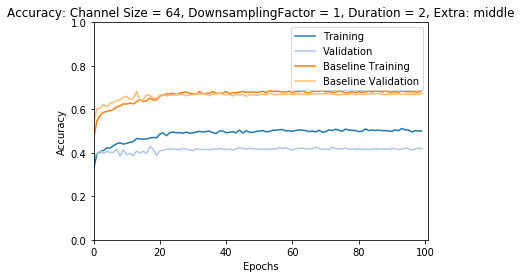

In [54]:
n_classes = 4
channel = 64
freq = 1
duration = 2
extra = 'middle'

rootdir = f'../results/' 

baseline = f'{rootdir}4class_64ch_freqfactor1/'

b_training_loss_str   = f'{baseline}train_loss_m1.csv'
b_validation_loss_str = f'{baseline}valid_loss_m1.csv'
b_training_accu_str    = f'{baseline}train_accu_m1.csv'
b_validation_accu_str  = f'{baseline}valid_accu_m1.csv'

#Read Data
b_training_loss_df    = np.loadtxt(b_training_loss_str)
b_validation_loss_df  = np.loadtxt(b_validation_loss_str)
b_training_accu_df     = np.loadtxt(b_training_accu_str)
b_validation_accu_df   = np.loadtxt(b_validation_accu_str)

currentdir = f'{rootdir}{n_classes}class_{channel}ch_freqfactor{freq}_duration_middle2/'

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)


# another method of plotting
'''
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        # print(os.path.join(subdir, file))

        data_path = os.path.join(subdir, file)
        array_data = np.loadtxt(data_path)
        plt.plot(array_data, label=file)

        plt.title(subdir)
        plt.xlabel('Epochs')
        plt.legend()
        counter = counter + 1
        if(counter > 3):
            for subdir2, dirs2, files2 in os.walk(baseline):
                for file2 in files2:
                    data_path2 = os.path.join(subdir2,file2)
                    array_data2 = np.loadtxt(data_path2)
                    plt.plot(array_data2, label='Baseline')
                    plt.legend()
            plt.show()
            counter = 0
'''


#print(f'LearningRate: 1e-4, Dropout: 0.1')
#Names of files to access
training_loss_str   = f'{currentdir}train_loss_m1.csv'
validation_loss_str = f'{currentdir}valid_loss_m1.csv'
training_accu_str    = f'{currentdir}train_accu_m1.csv'
validation_accu_str  = f'{currentdir}valid_accu_m1.csv'

'''
#Read Data
training_loss_df    = pd.read_csv(training_loss_str)
validation_loss_df  = pd.read_csv(validation_loss_str)
training_acc_df     = pd.read_csv(training_acc_str)
validation_acc_df   = pd.read_csv(validation_acc_str)
'''

#Read Data
training_loss_df    = np.loadtxt(training_loss_str)
validation_loss_df  = np.loadtxt(validation_loss_str)
training_accu_df     = np.loadtxt(training_accu_str)
validation_accu_df   = np.loadtxt(validation_accu_str)
###########Plot, label, save###########
# LOSS
plt.plot(training_loss_df,label='Training',color=tableau20[0])
plt.plot(validation_loss_df,label='Validation',color=tableau20[1])
plt.plot(b_training_loss_df,label = 'Baseline Training',color=tableau20[2])
plt.plot(b_validation_loss_df,label = 'Baseline Validation',color=tableau20[3])
plt.title(f'Loss: Channel Size = {channel}, DownsamplingFactor = {freq}, Duration = {duration}, Extra: {extra}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f'{n_classes}_{channel}ch_freqfactor{freq}_duration{duration}{extra}_loss.png')
plt.show()
# ACCURACY
plt.plot(training_accu_df,label='Training',color=tableau20[0])
plt.plot(validation_accu_df,label='Validation',color=tableau20[1])
plt.plot(b_training_accu_df,label = 'Baseline Training',color=tableau20[2])
plt.plot(b_validation_accu_df,label = 'Baseline Validation',color=tableau20[3])
plt.title(f'Accuracy: Channel Size = {channel}, DownsamplingFactor = {freq}, Duration = {duration}, Extra: {extra}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)    
plt.xlim(0, 101)
plt.legend()
plt.savefig(f'{n_classes}_{channel}ch_freqfactor{freq}_duration{duration}{extra}_accu.png')
plt.show()
